<h1><center><font color='#FF7043'> Flight Price Prediction </font></center></h1>

![Flight Fare](https://static.onecms.io/wp-content/uploads/sites/28/2017/11/flight-landing-INBNDCHECK1117.jpg)

![Flight Fare](https://img.freepik.com/free-vector/set-colourful-planes-helicopters-icons-flying-airplane-sky-flat-style-top-view-aircraft-military-plane-helicopters-collection-air-travel_167581-425.jpg?size=626&ext=jpg)

<h2><font color='gray'> Problem Statement </font></h2>
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records

Size of test set: 2671 records

##### FEATURES: 
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## <font color='gray'> Libraries </font>

In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
 
import warnings
warnings.filterwarnings('ignore')

## <font color='gray'> Data-Set </font>

In [2]:
# Loading the data-set
Train_Data = pd.read_excel(r"D:\Projects\2.Flight Fare\Data_Train.xlsx")

In [3]:
Test_Data = pd.read_excel(r"D:\Projects\2.Flight Fare\Test_set.xlsx")

In [4]:
Train_Data

Airline Date_of_Journey    Source Destination  \
0                 IndiGo      24/03/2019  Banglore   New Delhi   
1              Air India       1/05/2019   Kolkata    Banglore   
2            Jet Airways       9/06/2019     Delhi      Cochin   
3                 IndiGo      12/05/2019   Kolkata    Banglore   
4                 IndiGo      01/03/2019  Banglore   New Delhi   
5               SpiceJet      24/06/2019   Kolkata    Banglore   
6            Jet Airways      12/03/2019  Banglore   New Delhi   
7            Jet Airways      01/03/2019  Banglore   New Delhi   
8            Jet Airways      12/03/2019  Banglore   New Delhi   
9      Multiple carriers      27/05/2019     Delhi      Cochin   
10             Air India       1/06/2019     Delhi      Cochin   
11                IndiGo      18/04/2019   Kolkata    Banglore   
12             Air India      24/06/2019   Chennai     Kolkata   
13           Jet Airways       9/05/2019   Kolkata    Banglore   
14                IndiGo      24/04/2019   Kolkata    Banglore   
15             Air India       3/03/2019     Delhi      Cochin   
16              SpiceJet      15/04/2019     Delhi      Cochin   
17           Jet Airways      12/06/2019     Delhi      Cochin   
18             Air India      12/06/2019     Delhi      Cochin   
19           Jet Airways      27/05/2019     Delhi      Cochin   
20                 GoAir       6/03/2019     Delhi      Cochin   
21             Air India      21/03/2019  Banglore   New Delhi   
22                IndiGo       3/04/2019  Banglore       Delhi   
23                IndiGo       1/05/2019  Banglore       Delhi   
24           Jet Airways       6/05/2019   Kolkata    Banglore   
25           Jet Airways       9/06/2019     Delhi      Cochin   
26                IndiGo       1/06/2019     Delhi      Cochin   
27                 GoAir      15/05/2019     Delhi      Cochin   
28               Vistara      18/06/2019  Banglore       Delhi   
29               Vistara      15/06/2019   Chennai     Kolkata   
...                  ...             ...       ...         ...   
10653        Jet Airways       1/05/2019   Kolkata    Banglore   
10654           SpiceJet      12/06/2019  Banglore       Delhi   
10655        Jet Airways       3/05/2019    Mumbai   Hyderabad   
10656            Vistara       6/04/2019  Banglore       Delhi   
10657        Jet Airways       6/05/2019   Kolkata    Banglore   
10658        Jet Airways      18/06/2019  Banglore       Delhi   
10659            Vistara       1/05/2019  Banglore       Delhi   
10660            Vistara      21/03/2019  Banglore   New Delhi   
10661          Air India       9/05/2019     Delhi      Cochin   
10662          Air India      24/03/2019   Kolkata    Banglore   
10663        Jet Airways       6/06/2019     Delhi      Cochin   
10664             IndiGo       9/04/2019  Banglore       Delhi   
10665             IndiGo      27/04/2019   Kolkata    Banglore   
10666        Jet Airways      12/06/2019     Delhi      Cochin   
10667        Jet Airways      12/03/2019  Banglore   New Delhi   
10668        Jet Airways       9/05/2019     Delhi      Cochin   
10669          Air India      15/06/2019     Delhi      Cochin   
10670          Air India      12/05/2019   Kolkata    Banglore   
10671          Air India       6/06/2019    Mumbai   Hyderabad   
10672        Jet Airways      27/06/2019     Delhi      Cochin   
10673        Jet Airways      27/05/2019     Delhi      Cochin   
10674        Jet Airways      12/03/2019  Banglore   New Delhi   
10675          Air India       9/06/2019    Mumbai   Hyderabad   
10676  Multiple carriers       1/05/2019     Delhi      Cochin   
10677           SpiceJet      21/05/2019  Banglore       Delhi   
10678           Air Asia       9/04/2019   Kolkata    Banglore   
10679          Air India      27/04/2019   Kolkata    Banglore   
10680        Jet Airways      27/04/2019  Banglore       Delhi   
10681            Vistara      01/03/2019  Banglore   New 

### <font color='gray'> Understand the data </font>

### <font color='#BB8FCE'>Train Data Preprocesssing </font>

In [5]:
Train_Data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [6]:
Train_Data.describe(include='all')

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

In [7]:
# Checing the data information.
# Checking wheather data is missing or not, data types, and coulmns name.
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


**Here, column 'Route' and 'Total_Stops' having 10682 means on 1 value is missing out of 10683**

In [8]:
#Checking the shape of the data
Train_Data.shape

(10683, 11)

In [9]:
# read the first five rows
Train_Data.head()  

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [10]:
# read the last five rows
Train_Data.tail()  

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [11]:
# return an array of column names
Train_Data.columns.values  

array(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'], dtype=object)

In [12]:
Train_Data.columns.values.tolist()  # return a list of column names

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [13]:
# Checking the columns name
Train_Data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# Cheacking data types
Train_Data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
# Cheacking numeric values
Train_Data._get_numeric_data()

Price
0       3897
1       7662
2      13882
3       6218
4      13302
5       3873
6      11087
7      22270
8      11087
9       8625
10      8907
11      4174
12      4667
13      9663
14      4804
15     14011
16      5830
17     10262
18     13381
19     12898
20     19495
21      6955
22      3943
23      4823
24      7757
25     13292
26      8238
27      7682
28      4668
29      3687
...      ...
10653  14388
10654   4319
10655   5678
10656   5613
10657   9663
10658   5769
10659   4668
10660   4878
10661   8372
10662  12352
10663  11733
10664   4823
10665   4804
10666  10262
10667  11087
10668  21219
10669   9929
10670  11411
10671   3100
10672  11150
10673  16704
10674  11087
10675   3100
10676   9794
10677   3257
10678   4107
10679   4145
10680   7229
10681  12648
10682  11753

[10683 rows x 1 columns]

In [16]:
"""numeric_data = [key for key in dict(df.dtypes)
                   if dict(pd.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable

cat_data = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible """

"numeric_data = [key for key in dict(df.dtypes)\n                   if dict(pd.dtypes)[key]\n                       in ['float64','float32','int32','int64']] # Numeric Variable\n\ncat_data = [key for key in dict(df.dtypes)\n             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible "

In [17]:
# Checking numeric and categorical columns or variables
numCols = Train_Data.select_dtypes("number").columns
catCols = Train_Data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [18]:
numCols

['Price']

In [19]:
catCols

['Destination',
 'Duration',
 'Arrival_Time',
 'Source',
 'Date_of_Journey',
 'Dep_Time',
 'Total_Stops',
 'Additional_Info',
 'Airline',
 'Route']

## <font color='gray'> Check Missing Values </font>

In [20]:
# checking missing values
Train_Data.isnull()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0        False            False   False        False  False     False   
1        False            False   False        False  False     False   
2        False            False   False        False  False     False   
3        False            False   False        False  False     False   
4        False            False   False        False  False     False   
5        False            False   False        False  False     False   
6        False            False   False        False  False     False   
7        False            False   False        False  False     False   
8        False            False   False        False  False     False   
9        False            False   False        False  False     False   
10       False            False   False        False  False     False   
11       False            False   False        False  False     False   
12       False            False   False        False  False     False   
13       False            False   False        False  False     False   
14       False            False   False        False  False     False   
15       False            False   False        False  False     False   
16       False            False   False        False  False     False   
17       False            False   False        False  False     False   
18       False            False   False        False  False     False   
19       False            False   False        False  False     False   
20       False            False   False        False  False     False   
21       False            False   False        False  False     False   
22       False            False   False        False  False     False   
23       False            False   False        False  False     False   
24       False            False   False        False  False     False   
25       False            False   False        False  False     False   
26       False            False   False        False  False     False   
27       False            False   False        False  False     False   
28       False            False   False        False  False     False   
29       False            False   False        False  False     False   
...        ...              ...     ...          ...    ...       ...   
10653    False            False   False        False  False     False   
10654    False            False   False        False  False     False   
10655    False            False   False        False  False     False   
10656    False            False   False        False  False     False   
10657    False            False   False        False  False     False   
10658    False            False   False        False  False     False   
10659    False            False   False        False  False     False   
10660    False            False   False        False  False     False   
10661    False            False   False        False  False     False   
10662    False            False   False        False  False     False   
10663    False            False   False        False  False     False   
10664    False            False   False        False  False     False   
10665    False            False   False        False  False     False   
10666    False            False   False        False  False     False   
10667    False            False   False        False  False     False   
10668    False            False   False        False  False     False   
10669    False            False   False        False  False     False   
10670    False            False   False        False  False     False   
10671    False            False   False        False  False     False   
10672    False            False   False        False  False     False   
10673    False            False   False        False  False     False   
10674    False            False   False        False  False     False   
10675    False            False   False        False  False     F

In [21]:
# checking non-missing values
# count the number of NaN in this dataframe using dataframe.isnull()
Train_Data.notnull()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0         True             True    True         True   True      True   
1         True             True    True         True   True      True   
2         True             True    True         True   True      True   
3         True             True    True         True   True      True   
4         True             True    True         True   True      True   
5         True             True    True         True   True      True   
6         True             True    True         True   True      True   
7         True             True    True         True   True      True   
8         True             True    True         True   True      True   
9         True             True    True         True   True      True   
10        True             True    True         True   True      True   
11        True             True    True         True   True      True   
12        True             True    True         True   True      True   
13        True             True    True         True   True      True   
14        True             True    True         True   True      True   
15        True             True    True         True   True      True   
16        True             True    True         True   True      True   
17        True             True    True         True   True      True   
18        True             True    True         True   True      True   
19        True             True    True         True   True      True   
20        True             True    True         True   True      True   
21        True             True    True         True   True      True   
22        True             True    True         True   True      True   
23        True             True    True         True   True      True   
24        True             True    True         True   True      True   
25        True             True    True         True   True      True   
26        True             True    True         True   True      True   
27        True             True    True         True   True      True   
28        True             True    True         True   True      True   
29        True             True    True         True   True      True   
...        ...              ...     ...          ...    ...       ...   
10653     True             True    True         True   True      True   
10654     True             True    True         True   True      True   
10655     True             True    True         True   True      True   
10656     True             True    True         True   True      True   
10657     True             True    True         True   True      True   
10658     True             True    True         True   True      True   
10659     True             True    True         True   True      True   
10660     True             True    True         True   True      True   
10661     True             True    True         True   True      True   
10662     True             True    True         True   True      True   
10663     True             True    True         True   True      True   
10664     True             True    True         True   True      True   
10665     True             True    True         True   True      True   
10666     True             True    True         True   True      True   
10667     True             True    True         True   True      True   
10668     True             True    True         True   True      True   
10669     True             True    True         True   True      True   
10670     True             True    True         True   True      True   
10671     True             True    True         True   True      True   
10672     True             True    True         True   True      True   
10673     True             True    True         True   True      True   
10674     True             True    True         True   True      True   
10675     True             True    True         True   True      

In [22]:
# only want to know if there are any missing values
Train_Data.isnull().values.any()  

True

In [23]:
# knowling number of non-missing values for each variable
Train_Data.notnull().sum()  

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [24]:
# Count total NaN at each column in DataFrame
Train_Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [25]:
# knowing how many missing values in the data
# Count all NaN in a DataFrame (both columns & Rows)
Train_Data.isnull().sum().sum()  

2

OR

In [26]:
# OR By using these we can Cheacking missing values
print(Train_Data.isnull().values.sum())

2


In [27]:
# only want to know if there are any missing values in Route
Train_Data["Route"].isnull().values.any()  

True

In [28]:
# only want to know if there are any missing values in Total_Stops
Train_Data["Total_Stops"].isnull().values.any()  

True

In [29]:
# return the number of missing values in Route
Train_Data["Route"].isnull().sum()  

1

In [30]:
# return the number of missing values in Total_Stops
Train_Data["Total_Stops"].isnull().sum() 

1

In [31]:
# Count total NaN at each row in DataFrame
"""for i in range(len(df.index)) :
    print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum()) """

'for i in range(len(df.index)) :\n    print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum()) '

In [32]:
# In a single cell we get original dataframe,missing total value count, missing value in row and in cloumns.. etc

Train_Data = pd.read_excel(r"D:\Projects\2.Flight Fare\Data_Train.xlsx")

print("Original Dataframe" , Train_Data, sep='\n')

print("Check NaN in Dataframe" , Train_Data.isnull(), sep='\n')
    
print("***Count all NaN in a DataFrame (both columns & Rows)***")
    
print("Total NaN in Dataframe" , Train_Data.isnull().sum().sum(), sep='\n')
    
print("***Count NaN in each column of a DataFrame***")
    
print("Nan in each columns" , Train_Data.isnull().sum(), sep='\n')
    
print("***Count NaN in each row of a DataFrame***")
    
for i in range(len(Train_Data.index)) :
    print("Nan in row ", i , " : " ,  Train_Data.iloc[i].isnull().sum())

Original Dataframe
                 Airline Date_of_Journey    Source Destination  \
0                 IndiGo      24/03/2019  Banglore   New Delhi   
1              Air India       1/05/2019   Kolkata    Banglore   
2            Jet Airways       9/06/2019     Delhi      Cochin   
3                 IndiGo      12/05/2019   Kolkata    Banglore   
4                 IndiGo      01/03/2019  Banglore   New Delhi   
5               SpiceJet      24/06/2019   Kolkata    Banglore   
6            Jet Airways      12/03/2019  Banglore   New Delhi   
7            Jet Airways      01/03/2019  Banglore   New Delhi   
8            Jet Airways      12/03/2019  Banglore   New Delhi   
9      Multiple carriers      27/05/2019     Delhi      Cochin   
10             Air India       1/06/2019     Delhi      Cochin   
11                IndiGo      18/04/2019   Kolkata    Banglore   
12             Air India      24/06/2019   Chennai     Kolkata   
13           Jet Airways       9/05/2019   Kolkata    Ban

Nan in row  424  :  0
Nan in row  425  :  0
Nan in row  426  :  0
Nan in row  427  :  0
Nan in row  428  :  0
Nan in row  429  :  0
Nan in row  430  :  0
Nan in row  431  :  0
Nan in row  432  :  0
Nan in row  433  :  0
Nan in row  434  :  0
Nan in row  435  :  0
Nan in row  436  :  0
Nan in row  437  :  0
Nan in row  438  :  0
Nan in row  439  :  0
Nan in row  440  :  0
Nan in row  441  :  0
Nan in row  442  :  0
Nan in row  443  :  0
Nan in row  444  :  0
Nan in row  445  :  0
Nan in row  446  :  0
Nan in row  447  :  0
Nan in row  448  :  0
Nan in row  449  :  0
Nan in row  450  :  0
Nan in row  451  :  0
Nan in row  452  :  0
Nan in row  453  :  0
Nan in row  454  :  0
Nan in row  455  :  0
Nan in row  456  :  0
Nan in row  457  :  0
Nan in row  458  :  0
Nan in row  459  :  0
Nan in row  460  :  0
Nan in row  461  :  0
Nan in row  462  :  0
Nan in row  463  :  0
Nan in row  464  :  0
Nan in row  465  :  0
Nan in row  466  :  0
Nan in row  467  :  0
Nan in row  468  :  0
Nan in row

Nan in row  1172  :  0
Nan in row  1173  :  0
Nan in row  1174  :  0
Nan in row  1175  :  0
Nan in row  1176  :  0
Nan in row  1177  :  0
Nan in row  1178  :  0
Nan in row  1179  :  0
Nan in row  1180  :  0
Nan in row  1181  :  0
Nan in row  1182  :  0
Nan in row  1183  :  0
Nan in row  1184  :  0
Nan in row  1185  :  0
Nan in row  1186  :  0
Nan in row  1187  :  0
Nan in row  1188  :  0
Nan in row  1189  :  0
Nan in row  1190  :  0
Nan in row  1191  :  0
Nan in row  1192  :  0
Nan in row  1193  :  0
Nan in row  1194  :  0
Nan in row  1195  :  0
Nan in row  1196  :  0
Nan in row  1197  :  0
Nan in row  1198  :  0
Nan in row  1199  :  0
Nan in row  1200  :  0
Nan in row  1201  :  0
Nan in row  1202  :  0
Nan in row  1203  :  0
Nan in row  1204  :  0
Nan in row  1205  :  0
Nan in row  1206  :  0
Nan in row  1207  :  0
Nan in row  1208  :  0
Nan in row  1209  :  0
Nan in row  1210  :  0
Nan in row  1211  :  0
Nan in row  1212  :  0
Nan in row  1213  :  0
Nan in row  1214  :  0
Nan in row 

Nan in row  1545  :  0
Nan in row  1546  :  0
Nan in row  1547  :  0
Nan in row  1548  :  0
Nan in row  1549  :  0
Nan in row  1550  :  0
Nan in row  1551  :  0
Nan in row  1552  :  0
Nan in row  1553  :  0
Nan in row  1554  :  0
Nan in row  1555  :  0
Nan in row  1556  :  0
Nan in row  1557  :  0
Nan in row  1558  :  0
Nan in row  1559  :  0
Nan in row  1560  :  0
Nan in row  1561  :  0
Nan in row  1562  :  0
Nan in row  1563  :  0
Nan in row  1564  :  0
Nan in row  1565  :  0
Nan in row  1566  :  0
Nan in row  1567  :  0
Nan in row  1568  :  0
Nan in row  1569  :  0
Nan in row  1570  :  0
Nan in row  1571  :  0
Nan in row  1572  :  0
Nan in row  1573  :  0
Nan in row  1574  :  0
Nan in row  1575  :  0
Nan in row  1576  :  0
Nan in row  1577  :  0
Nan in row  1578  :  0
Nan in row  1579  :  0
Nan in row  1580  :  0
Nan in row  1581  :  0
Nan in row  1582  :  0
Nan in row  1583  :  0
Nan in row  1584  :  0
Nan in row  1585  :  0
Nan in row  1586  :  0
Nan in row  1587  :  0
Nan in row 

Nan in row  1935  :  0
Nan in row  1936  :  0
Nan in row  1937  :  0
Nan in row  1938  :  0
Nan in row  1939  :  0
Nan in row  1940  :  0
Nan in row  1941  :  0
Nan in row  1942  :  0
Nan in row  1943  :  0
Nan in row  1944  :  0
Nan in row  1945  :  0
Nan in row  1946  :  0
Nan in row  1947  :  0
Nan in row  1948  :  0
Nan in row  1949  :  0
Nan in row  1950  :  0
Nan in row  1951  :  0
Nan in row  1952  :  0
Nan in row  1953  :  0
Nan in row  1954  :  0
Nan in row  1955  :  0
Nan in row  1956  :  0
Nan in row  1957  :  0
Nan in row  1958  :  0
Nan in row  1959  :  0
Nan in row  1960  :  0
Nan in row  1961  :  0
Nan in row  1962  :  0
Nan in row  1963  :  0
Nan in row  1964  :  0
Nan in row  1965  :  0
Nan in row  1966  :  0
Nan in row  1967  :  0
Nan in row  1968  :  0
Nan in row  1969  :  0
Nan in row  1970  :  0
Nan in row  1971  :  0
Nan in row  1972  :  0
Nan in row  1973  :  0
Nan in row  1974  :  0
Nan in row  1975  :  0
Nan in row  1976  :  0
Nan in row  1977  :  0
Nan in row 

Nan in row  2309  :  0
Nan in row  2310  :  0
Nan in row  2311  :  0
Nan in row  2312  :  0
Nan in row  2313  :  0
Nan in row  2314  :  0
Nan in row  2315  :  0
Nan in row  2316  :  0
Nan in row  2317  :  0
Nan in row  2318  :  0
Nan in row  2319  :  0
Nan in row  2320  :  0
Nan in row  2321  :  0
Nan in row  2322  :  0
Nan in row  2323  :  0
Nan in row  2324  :  0
Nan in row  2325  :  0
Nan in row  2326  :  0
Nan in row  2327  :  0
Nan in row  2328  :  0
Nan in row  2329  :  0
Nan in row  2330  :  0
Nan in row  2331  :  0
Nan in row  2332  :  0
Nan in row  2333  :  0
Nan in row  2334  :  0
Nan in row  2335  :  0
Nan in row  2336  :  0
Nan in row  2337  :  0
Nan in row  2338  :  0
Nan in row  2339  :  0
Nan in row  2340  :  0
Nan in row  2341  :  0
Nan in row  2342  :  0
Nan in row  2343  :  0
Nan in row  2344  :  0
Nan in row  2345  :  0
Nan in row  2346  :  0
Nan in row  2347  :  0
Nan in row  2348  :  0
Nan in row  2349  :  0
Nan in row  2350  :  0
Nan in row  2351  :  0
Nan in row 

Nan in row  2719  :  0
Nan in row  2720  :  0
Nan in row  2721  :  0
Nan in row  2722  :  0
Nan in row  2723  :  0
Nan in row  2724  :  0
Nan in row  2725  :  0
Nan in row  2726  :  0
Nan in row  2727  :  0
Nan in row  2728  :  0
Nan in row  2729  :  0
Nan in row  2730  :  0
Nan in row  2731  :  0
Nan in row  2732  :  0
Nan in row  2733  :  0
Nan in row  2734  :  0
Nan in row  2735  :  0
Nan in row  2736  :  0
Nan in row  2737  :  0
Nan in row  2738  :  0
Nan in row  2739  :  0
Nan in row  2740  :  0
Nan in row  2741  :  0
Nan in row  2742  :  0
Nan in row  2743  :  0
Nan in row  2744  :  0
Nan in row  2745  :  0
Nan in row  2746  :  0
Nan in row  2747  :  0
Nan in row  2748  :  0
Nan in row  2749  :  0
Nan in row  2750  :  0
Nan in row  2751  :  0
Nan in row  2752  :  0
Nan in row  2753  :  0
Nan in row  2754  :  0
Nan in row  2755  :  0
Nan in row  2756  :  0
Nan in row  2757  :  0
Nan in row  2758  :  0
Nan in row  2759  :  0
Nan in row  2760  :  0
Nan in row  2761  :  0
Nan in row 

Nan in row  3121  :  0
Nan in row  3122  :  0
Nan in row  3123  :  0
Nan in row  3124  :  0
Nan in row  3125  :  0
Nan in row  3126  :  0
Nan in row  3127  :  0
Nan in row  3128  :  0
Nan in row  3129  :  0
Nan in row  3130  :  0
Nan in row  3131  :  0
Nan in row  3132  :  0
Nan in row  3133  :  0
Nan in row  3134  :  0
Nan in row  3135  :  0
Nan in row  3136  :  0
Nan in row  3137  :  0
Nan in row  3138  :  0
Nan in row  3139  :  0
Nan in row  3140  :  0
Nan in row  3141  :  0
Nan in row  3142  :  0
Nan in row  3143  :  0
Nan in row  3144  :  0
Nan in row  3145  :  0
Nan in row  3146  :  0
Nan in row  3147  :  0
Nan in row  3148  :  0
Nan in row  3149  :  0
Nan in row  3150  :  0
Nan in row  3151  :  0
Nan in row  3152  :  0
Nan in row  3153  :  0
Nan in row  3154  :  0
Nan in row  3155  :  0
Nan in row  3156  :  0
Nan in row  3157  :  0
Nan in row  3158  :  0
Nan in row  3159  :  0
Nan in row  3160  :  0
Nan in row  3161  :  0
Nan in row  3162  :  0
Nan in row  3163  :  0
Nan in row 

Nan in row  3541  :  0
Nan in row  3542  :  0
Nan in row  3543  :  0
Nan in row  3544  :  0
Nan in row  3545  :  0
Nan in row  3546  :  0
Nan in row  3547  :  0
Nan in row  3548  :  0
Nan in row  3549  :  0
Nan in row  3550  :  0
Nan in row  3551  :  0
Nan in row  3552  :  0
Nan in row  3553  :  0
Nan in row  3554  :  0
Nan in row  3555  :  0
Nan in row  3556  :  0
Nan in row  3557  :  0
Nan in row  3558  :  0
Nan in row  3559  :  0
Nan in row  3560  :  0
Nan in row  3561  :  0
Nan in row  3562  :  0
Nan in row  3563  :  0
Nan in row  3564  :  0
Nan in row  3565  :  0
Nan in row  3566  :  0
Nan in row  3567  :  0
Nan in row  3568  :  0
Nan in row  3569  :  0
Nan in row  3570  :  0
Nan in row  3571  :  0
Nan in row  3572  :  0
Nan in row  3573  :  0
Nan in row  3574  :  0
Nan in row  3575  :  0
Nan in row  3576  :  0
Nan in row  3577  :  0
Nan in row  3578  :  0
Nan in row  3579  :  0
Nan in row  3580  :  0
Nan in row  3581  :  0
Nan in row  3582  :  0
Nan in row  3583  :  0
Nan in row 

Nan in row  3934  :  0
Nan in row  3935  :  0
Nan in row  3936  :  0
Nan in row  3937  :  0
Nan in row  3938  :  0
Nan in row  3939  :  0
Nan in row  3940  :  0
Nan in row  3941  :  0
Nan in row  3942  :  0
Nan in row  3943  :  0
Nan in row  3944  :  0
Nan in row  3945  :  0
Nan in row  3946  :  0
Nan in row  3947  :  0
Nan in row  3948  :  0
Nan in row  3949  :  0
Nan in row  3950  :  0
Nan in row  3951  :  0
Nan in row  3952  :  0
Nan in row  3953  :  0
Nan in row  3954  :  0
Nan in row  3955  :  0
Nan in row  3956  :  0
Nan in row  3957  :  0
Nan in row  3958  :  0
Nan in row  3959  :  0
Nan in row  3960  :  0
Nan in row  3961  :  0
Nan in row  3962  :  0
Nan in row  3963  :  0
Nan in row  3964  :  0
Nan in row  3965  :  0
Nan in row  3966  :  0
Nan in row  3967  :  0
Nan in row  3968  :  0
Nan in row  3969  :  0
Nan in row  3970  :  0
Nan in row  3971  :  0
Nan in row  3972  :  0
Nan in row  3973  :  0
Nan in row  3974  :  0
Nan in row  3975  :  0
Nan in row  3976  :  0
Nan in row 

Nan in row  4353  :  0
Nan in row  4354  :  0
Nan in row  4355  :  0
Nan in row  4356  :  0
Nan in row  4357  :  0
Nan in row  4358  :  0
Nan in row  4359  :  0
Nan in row  4360  :  0
Nan in row  4361  :  0
Nan in row  4362  :  0
Nan in row  4363  :  0
Nan in row  4364  :  0
Nan in row  4365  :  0
Nan in row  4366  :  0
Nan in row  4367  :  0
Nan in row  4368  :  0
Nan in row  4369  :  0
Nan in row  4370  :  0
Nan in row  4371  :  0
Nan in row  4372  :  0
Nan in row  4373  :  0
Nan in row  4374  :  0
Nan in row  4375  :  0
Nan in row  4376  :  0
Nan in row  4377  :  0
Nan in row  4378  :  0
Nan in row  4379  :  0
Nan in row  4380  :  0
Nan in row  4381  :  0
Nan in row  4382  :  0
Nan in row  4383  :  0
Nan in row  4384  :  0
Nan in row  4385  :  0
Nan in row  4386  :  0
Nan in row  4387  :  0
Nan in row  4388  :  0
Nan in row  4389  :  0
Nan in row  4390  :  0
Nan in row  4391  :  0
Nan in row  4392  :  0
Nan in row  4393  :  0
Nan in row  4394  :  0
Nan in row  4395  :  0
Nan in row 

Nan in row  4763  :  0
Nan in row  4764  :  0
Nan in row  4765  :  0
Nan in row  4766  :  0
Nan in row  4767  :  0
Nan in row  4768  :  0
Nan in row  4769  :  0
Nan in row  4770  :  0
Nan in row  4771  :  0
Nan in row  4772  :  0
Nan in row  4773  :  0
Nan in row  4774  :  0
Nan in row  4775  :  0
Nan in row  4776  :  0
Nan in row  4777  :  0
Nan in row  4778  :  0
Nan in row  4779  :  0
Nan in row  4780  :  0
Nan in row  4781  :  0
Nan in row  4782  :  0
Nan in row  4783  :  0
Nan in row  4784  :  0
Nan in row  4785  :  0
Nan in row  4786  :  0
Nan in row  4787  :  0
Nan in row  4788  :  0
Nan in row  4789  :  0
Nan in row  4790  :  0
Nan in row  4791  :  0
Nan in row  4792  :  0
Nan in row  4793  :  0
Nan in row  4794  :  0
Nan in row  4795  :  0
Nan in row  4796  :  0
Nan in row  4797  :  0
Nan in row  4798  :  0
Nan in row  4799  :  0
Nan in row  4800  :  0
Nan in row  4801  :  0
Nan in row  4802  :  0
Nan in row  4803  :  0
Nan in row  4804  :  0
Nan in row  4805  :  0
Nan in row 

Nan in row  5184  :  0
Nan in row  5185  :  0
Nan in row  5186  :  0
Nan in row  5187  :  0
Nan in row  5188  :  0
Nan in row  5189  :  0
Nan in row  5190  :  0
Nan in row  5191  :  0
Nan in row  5192  :  0
Nan in row  5193  :  0
Nan in row  5194  :  0
Nan in row  5195  :  0
Nan in row  5196  :  0
Nan in row  5197  :  0
Nan in row  5198  :  0
Nan in row  5199  :  0
Nan in row  5200  :  0
Nan in row  5201  :  0
Nan in row  5202  :  0
Nan in row  5203  :  0
Nan in row  5204  :  0
Nan in row  5205  :  0
Nan in row  5206  :  0
Nan in row  5207  :  0
Nan in row  5208  :  0
Nan in row  5209  :  0
Nan in row  5210  :  0
Nan in row  5211  :  0
Nan in row  5212  :  0
Nan in row  5213  :  0
Nan in row  5214  :  0
Nan in row  5215  :  0
Nan in row  5216  :  0
Nan in row  5217  :  0
Nan in row  5218  :  0
Nan in row  5219  :  0
Nan in row  5220  :  0
Nan in row  5221  :  0
Nan in row  5222  :  0
Nan in row  5223  :  0
Nan in row  5224  :  0
Nan in row  5225  :  0
Nan in row  5226  :  0
Nan in row 

Nan in row  5615  :  0
Nan in row  5616  :  0
Nan in row  5617  :  0
Nan in row  5618  :  0
Nan in row  5619  :  0
Nan in row  5620  :  0
Nan in row  5621  :  0
Nan in row  5622  :  0
Nan in row  5623  :  0
Nan in row  5624  :  0
Nan in row  5625  :  0
Nan in row  5626  :  0
Nan in row  5627  :  0
Nan in row  5628  :  0
Nan in row  5629  :  0
Nan in row  5630  :  0
Nan in row  5631  :  0
Nan in row  5632  :  0
Nan in row  5633  :  0
Nan in row  5634  :  0
Nan in row  5635  :  0
Nan in row  5636  :  0
Nan in row  5637  :  0
Nan in row  5638  :  0
Nan in row  5639  :  0
Nan in row  5640  :  0
Nan in row  5641  :  0
Nan in row  5642  :  0
Nan in row  5643  :  0
Nan in row  5644  :  0
Nan in row  5645  :  0
Nan in row  5646  :  0
Nan in row  5647  :  0
Nan in row  5648  :  0
Nan in row  5649  :  0
Nan in row  5650  :  0
Nan in row  5651  :  0
Nan in row  5652  :  0
Nan in row  5653  :  0
Nan in row  5654  :  0
Nan in row  5655  :  0
Nan in row  5656  :  0
Nan in row  5657  :  0
Nan in row 

Nan in row  6058  :  0
Nan in row  6059  :  0
Nan in row  6060  :  0
Nan in row  6061  :  0
Nan in row  6062  :  0
Nan in row  6063  :  0
Nan in row  6064  :  0
Nan in row  6065  :  0
Nan in row  6066  :  0
Nan in row  6067  :  0
Nan in row  6068  :  0
Nan in row  6069  :  0
Nan in row  6070  :  0
Nan in row  6071  :  0
Nan in row  6072  :  0
Nan in row  6073  :  0
Nan in row  6074  :  0
Nan in row  6075  :  0
Nan in row  6076  :  0
Nan in row  6077  :  0
Nan in row  6078  :  0
Nan in row  6079  :  0
Nan in row  6080  :  0
Nan in row  6081  :  0
Nan in row  6082  :  0
Nan in row  6083  :  0
Nan in row  6084  :  0
Nan in row  6085  :  0
Nan in row  6086  :  0
Nan in row  6087  :  0
Nan in row  6088  :  0
Nan in row  6089  :  0
Nan in row  6090  :  0
Nan in row  6091  :  0
Nan in row  6092  :  0
Nan in row  6093  :  0
Nan in row  6094  :  0
Nan in row  6095  :  0
Nan in row  6096  :  0
Nan in row  6097  :  0
Nan in row  6098  :  0
Nan in row  6099  :  0
Nan in row  6100  :  0
Nan in row 

Nan in row  6477  :  0
Nan in row  6478  :  0
Nan in row  6479  :  0
Nan in row  6480  :  0
Nan in row  6481  :  0
Nan in row  6482  :  0
Nan in row  6483  :  0
Nan in row  6484  :  0
Nan in row  6485  :  0
Nan in row  6486  :  0
Nan in row  6487  :  0
Nan in row  6488  :  0
Nan in row  6489  :  0
Nan in row  6490  :  0
Nan in row  6491  :  0
Nan in row  6492  :  0
Nan in row  6493  :  0
Nan in row  6494  :  0
Nan in row  6495  :  0
Nan in row  6496  :  0
Nan in row  6497  :  0
Nan in row  6498  :  0
Nan in row  6499  :  0
Nan in row  6500  :  0
Nan in row  6501  :  0
Nan in row  6502  :  0
Nan in row  6503  :  0
Nan in row  6504  :  0
Nan in row  6505  :  0
Nan in row  6506  :  0
Nan in row  6507  :  0
Nan in row  6508  :  0
Nan in row  6509  :  0
Nan in row  6510  :  0
Nan in row  6511  :  0
Nan in row  6512  :  0
Nan in row  6513  :  0
Nan in row  6514  :  0
Nan in row  6515  :  0
Nan in row  6516  :  0
Nan in row  6517  :  0
Nan in row  6518  :  0
Nan in row  6519  :  0
Nan in row 

Nan in row  6901  :  0
Nan in row  6902  :  0
Nan in row  6903  :  0
Nan in row  6904  :  0
Nan in row  6905  :  0
Nan in row  6906  :  0
Nan in row  6907  :  0
Nan in row  6908  :  0
Nan in row  6909  :  0
Nan in row  6910  :  0
Nan in row  6911  :  0
Nan in row  6912  :  0
Nan in row  6913  :  0
Nan in row  6914  :  0
Nan in row  6915  :  0
Nan in row  6916  :  0
Nan in row  6917  :  0
Nan in row  6918  :  0
Nan in row  6919  :  0
Nan in row  6920  :  0
Nan in row  6921  :  0
Nan in row  6922  :  0
Nan in row  6923  :  0
Nan in row  6924  :  0
Nan in row  6925  :  0
Nan in row  6926  :  0
Nan in row  6927  :  0
Nan in row  6928  :  0
Nan in row  6929  :  0
Nan in row  6930  :  0
Nan in row  6931  :  0
Nan in row  6932  :  0
Nan in row  6933  :  0
Nan in row  6934  :  0
Nan in row  6935  :  0
Nan in row  6936  :  0
Nan in row  6937  :  0
Nan in row  6938  :  0
Nan in row  6939  :  0
Nan in row  6940  :  0
Nan in row  6941  :  0
Nan in row  6942  :  0
Nan in row  6943  :  0
Nan in row 

Nan in row  7308  :  0
Nan in row  7309  :  0
Nan in row  7310  :  0
Nan in row  7311  :  0
Nan in row  7312  :  0
Nan in row  7313  :  0
Nan in row  7314  :  0
Nan in row  7315  :  0
Nan in row  7316  :  0
Nan in row  7317  :  0
Nan in row  7318  :  0
Nan in row  7319  :  0
Nan in row  7320  :  0
Nan in row  7321  :  0
Nan in row  7322  :  0
Nan in row  7323  :  0
Nan in row  7324  :  0
Nan in row  7325  :  0
Nan in row  7326  :  0
Nan in row  7327  :  0
Nan in row  7328  :  0
Nan in row  7329  :  0
Nan in row  7330  :  0
Nan in row  7331  :  0
Nan in row  7332  :  0
Nan in row  7333  :  0
Nan in row  7334  :  0
Nan in row  7335  :  0
Nan in row  7336  :  0
Nan in row  7337  :  0
Nan in row  7338  :  0
Nan in row  7339  :  0
Nan in row  7340  :  0
Nan in row  7341  :  0
Nan in row  7342  :  0
Nan in row  7343  :  0
Nan in row  7344  :  0
Nan in row  7345  :  0
Nan in row  7346  :  0
Nan in row  7347  :  0
Nan in row  7348  :  0
Nan in row  7349  :  0
Nan in row  7350  :  0
Nan in row 

Nan in row  7745  :  0
Nan in row  7746  :  0
Nan in row  7747  :  0
Nan in row  7748  :  0
Nan in row  7749  :  0
Nan in row  7750  :  0
Nan in row  7751  :  0
Nan in row  7752  :  0
Nan in row  7753  :  0
Nan in row  7754  :  0
Nan in row  7755  :  0
Nan in row  7756  :  0
Nan in row  7757  :  0
Nan in row  7758  :  0
Nan in row  7759  :  0
Nan in row  7760  :  0
Nan in row  7761  :  0
Nan in row  7762  :  0
Nan in row  7763  :  0
Nan in row  7764  :  0
Nan in row  7765  :  0
Nan in row  7766  :  0
Nan in row  7767  :  0
Nan in row  7768  :  0
Nan in row  7769  :  0
Nan in row  7770  :  0
Nan in row  7771  :  0
Nan in row  7772  :  0
Nan in row  7773  :  0
Nan in row  7774  :  0
Nan in row  7775  :  0
Nan in row  7776  :  0
Nan in row  7777  :  0
Nan in row  7778  :  0
Nan in row  7779  :  0
Nan in row  7780  :  0
Nan in row  7781  :  0
Nan in row  7782  :  0
Nan in row  7783  :  0
Nan in row  7784  :  0
Nan in row  7785  :  0
Nan in row  7786  :  0
Nan in row  7787  :  0
Nan in row 

Nan in row  8183  :  0
Nan in row  8184  :  0
Nan in row  8185  :  0
Nan in row  8186  :  0
Nan in row  8187  :  0
Nan in row  8188  :  0
Nan in row  8189  :  0
Nan in row  8190  :  0
Nan in row  8191  :  0
Nan in row  8192  :  0
Nan in row  8193  :  0
Nan in row  8194  :  0
Nan in row  8195  :  0
Nan in row  8196  :  0
Nan in row  8197  :  0
Nan in row  8198  :  0
Nan in row  8199  :  0
Nan in row  8200  :  0
Nan in row  8201  :  0
Nan in row  8202  :  0
Nan in row  8203  :  0
Nan in row  8204  :  0
Nan in row  8205  :  0
Nan in row  8206  :  0
Nan in row  8207  :  0
Nan in row  8208  :  0
Nan in row  8209  :  0
Nan in row  8210  :  0
Nan in row  8211  :  0
Nan in row  8212  :  0
Nan in row  8213  :  0
Nan in row  8214  :  0
Nan in row  8215  :  0
Nan in row  8216  :  0
Nan in row  8217  :  0
Nan in row  8218  :  0
Nan in row  8219  :  0
Nan in row  8220  :  0
Nan in row  8221  :  0
Nan in row  8222  :  0
Nan in row  8223  :  0
Nan in row  8224  :  0
Nan in row  8225  :  0
Nan in row 

Nan in row  8586  :  0
Nan in row  8587  :  0
Nan in row  8588  :  0
Nan in row  8589  :  0
Nan in row  8590  :  0
Nan in row  8591  :  0
Nan in row  8592  :  0
Nan in row  8593  :  0
Nan in row  8594  :  0
Nan in row  8595  :  0
Nan in row  8596  :  0
Nan in row  8597  :  0
Nan in row  8598  :  0
Nan in row  8599  :  0
Nan in row  8600  :  0
Nan in row  8601  :  0
Nan in row  8602  :  0
Nan in row  8603  :  0
Nan in row  8604  :  0
Nan in row  8605  :  0
Nan in row  8606  :  0
Nan in row  8607  :  0
Nan in row  8608  :  0
Nan in row  8609  :  0
Nan in row  8610  :  0
Nan in row  8611  :  0
Nan in row  8612  :  0
Nan in row  8613  :  0
Nan in row  8614  :  0
Nan in row  8615  :  0
Nan in row  8616  :  0
Nan in row  8617  :  0
Nan in row  8618  :  0
Nan in row  8619  :  0
Nan in row  8620  :  0
Nan in row  8621  :  0
Nan in row  8622  :  0
Nan in row  8623  :  0
Nan in row  8624  :  0
Nan in row  8625  :  0
Nan in row  8626  :  0
Nan in row  8627  :  0
Nan in row  8628  :  0
Nan in row 

Nan in row  9020  :  0
Nan in row  9021  :  0
Nan in row  9022  :  0
Nan in row  9023  :  0
Nan in row  9024  :  0
Nan in row  9025  :  0
Nan in row  9026  :  0
Nan in row  9027  :  0
Nan in row  9028  :  0
Nan in row  9029  :  0
Nan in row  9030  :  0
Nan in row  9031  :  0
Nan in row  9032  :  0
Nan in row  9033  :  0
Nan in row  9034  :  0
Nan in row  9035  :  0
Nan in row  9036  :  0
Nan in row  9037  :  0
Nan in row  9038  :  0
Nan in row  9039  :  2
Nan in row  9040  :  0
Nan in row  9041  :  0
Nan in row  9042  :  0
Nan in row  9043  :  0
Nan in row  9044  :  0
Nan in row  9045  :  0
Nan in row  9046  :  0
Nan in row  9047  :  0
Nan in row  9048  :  0
Nan in row  9049  :  0
Nan in row  9050  :  0
Nan in row  9051  :  0
Nan in row  9052  :  0
Nan in row  9053  :  0
Nan in row  9054  :  0
Nan in row  9055  :  0
Nan in row  9056  :  0
Nan in row  9057  :  0
Nan in row  9058  :  0
Nan in row  9059  :  0
Nan in row  9060  :  0
Nan in row  9061  :  0
Nan in row  9062  :  0
Nan in row 

Nan in row  9432  :  0
Nan in row  9433  :  0
Nan in row  9434  :  0
Nan in row  9435  :  0
Nan in row  9436  :  0
Nan in row  9437  :  0
Nan in row  9438  :  0
Nan in row  9439  :  0
Nan in row  9440  :  0
Nan in row  9441  :  0
Nan in row  9442  :  0
Nan in row  9443  :  0
Nan in row  9444  :  0
Nan in row  9445  :  0
Nan in row  9446  :  0
Nan in row  9447  :  0
Nan in row  9448  :  0
Nan in row  9449  :  0
Nan in row  9450  :  0
Nan in row  9451  :  0
Nan in row  9452  :  0
Nan in row  9453  :  0
Nan in row  9454  :  0
Nan in row  9455  :  0
Nan in row  9456  :  0
Nan in row  9457  :  0
Nan in row  9458  :  0
Nan in row  9459  :  0
Nan in row  9460  :  0
Nan in row  9461  :  0
Nan in row  9462  :  0
Nan in row  9463  :  0
Nan in row  9464  :  0
Nan in row  9465  :  0
Nan in row  9466  :  0
Nan in row  9467  :  0
Nan in row  9468  :  0
Nan in row  9469  :  0
Nan in row  9470  :  0
Nan in row  9471  :  0
Nan in row  9472  :  0
Nan in row  9473  :  0
Nan in row  9474  :  0
Nan in row 

Nan in row  9889  :  0
Nan in row  9890  :  0
Nan in row  9891  :  0
Nan in row  9892  :  0
Nan in row  9893  :  0
Nan in row  9894  :  0
Nan in row  9895  :  0
Nan in row  9896  :  0
Nan in row  9897  :  0
Nan in row  9898  :  0
Nan in row  9899  :  0
Nan in row  9900  :  0
Nan in row  9901  :  0
Nan in row  9902  :  0
Nan in row  9903  :  0
Nan in row  9904  :  0
Nan in row  9905  :  0
Nan in row  9906  :  0
Nan in row  9907  :  0
Nan in row  9908  :  0
Nan in row  9909  :  0
Nan in row  9910  :  0
Nan in row  9911  :  0
Nan in row  9912  :  0
Nan in row  9913  :  0
Nan in row  9914  :  0
Nan in row  9915  :  0
Nan in row  9916  :  0
Nan in row  9917  :  0
Nan in row  9918  :  0
Nan in row  9919  :  0
Nan in row  9920  :  0
Nan in row  9921  :  0
Nan in row  9922  :  0
Nan in row  9923  :  0
Nan in row  9924  :  0
Nan in row  9925  :  0
Nan in row  9926  :  0
Nan in row  9927  :  0
Nan in row  9928  :  0
Nan in row  9929  :  0
Nan in row  9930  :  0
Nan in row  9931  :  0
Nan in row 

Nan in row  10307  :  0
Nan in row  10308  :  0
Nan in row  10309  :  0
Nan in row  10310  :  0
Nan in row  10311  :  0
Nan in row  10312  :  0
Nan in row  10313  :  0
Nan in row  10314  :  0
Nan in row  10315  :  0
Nan in row  10316  :  0
Nan in row  10317  :  0
Nan in row  10318  :  0
Nan in row  10319  :  0
Nan in row  10320  :  0
Nan in row  10321  :  0
Nan in row  10322  :  0
Nan in row  10323  :  0
Nan in row  10324  :  0
Nan in row  10325  :  0
Nan in row  10326  :  0
Nan in row  10327  :  0
Nan in row  10328  :  0
Nan in row  10329  :  0
Nan in row  10330  :  0
Nan in row  10331  :  0
Nan in row  10332  :  0
Nan in row  10333  :  0
Nan in row  10334  :  0
Nan in row  10335  :  0
Nan in row  10336  :  0
Nan in row  10337  :  0
Nan in row  10338  :  0
Nan in row  10339  :  0
Nan in row  10340  :  0
Nan in row  10341  :  0
Nan in row  10342  :  0
Nan in row  10343  :  0
Nan in row  10344  :  0
Nan in row  10345  :  0
Nan in row  10346  :  0
Nan in row  10347  :  0
Nan in row  1034

## <font color='gray'> Get information without missing values </font>
A simple way to deal with data containing missing values is to skip rows with missing values in the dataset. 

In [33]:
Train_Data.dropna(inplace = True)

When __inplace = True__ , the data is modified in place, which means it will return nothing and the dataframe is now updated. 
When __inplace = False__ , which is the default, then the operation is performed and it returns a copy of the object. 
You then need to save it to something.

In [34]:
Train_Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [35]:
Train_Data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

## <font color='gray'> Feature Engineering ( Dividing data into features and labels) </font>

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [36]:
Train_Data["Journey_day"] = pd.to_datetime(Train_Data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [37]:
Train_Data["Journey_month"] = pd.to_datetime(Train_Data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [38]:
Train_Data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [39]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

Train_Data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [40]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Train_Data["Dep_hour"] = pd.to_datetime(Train_Data["Dep_Time"]).dt.hour

# Extracting Minutes
Train_Data["Dep_min"] = pd.to_datetime(Train_Data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
Train_Data.drop(["Dep_Time"], axis = 1, inplace = True)

In [41]:
Train_Data.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

In [42]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
Train_Data["Arrival_hour"] = pd.to_datetime(Train_Data.Arrival_Time).dt.hour

# Extracting Minutes
Train_Data["Arrival_min"] = pd.to_datetime(Train_Data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
Train_Data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [43]:
Train_Data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50            13           15  
2       25             4           25  
3        5            23           30  
4       50            21           35

In [44]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(Train_Data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [45]:
# Adding duration_hours and duration_mins list to train_data dataframe

Train_Data["Duration_hours"] = duration_hours
Train_Data["Duration_mins"] = duration_mins

In [46]:
Train_Data.drop(["Duration"], axis = 1, inplace = True)

In [47]:
Train_Data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   
2         No info  13882            9              6         9       25   
3         No info   6218           12              5        18        5   
4         No info  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

## <font color='gray'> EDA </font>

### Exploratory Data Analysis
![Data Science Process: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/350px-Data_visualization_process_v1.png)
**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.**

### <font color='#48C9B0'>Airline </font>

In [48]:
Train_Data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [49]:
# Airline VS Price
pd.crosstab(Train_Data['Airline'],Train_Data['Price']).style.background_gradient(cmap='winter')

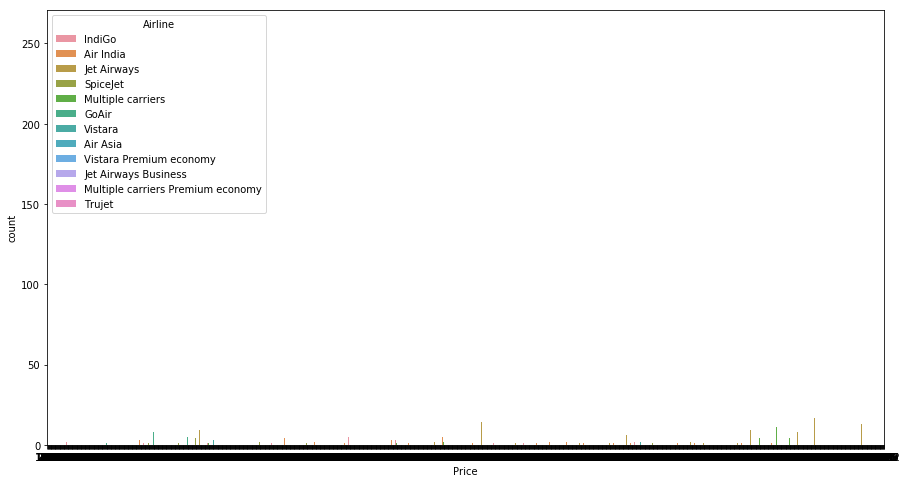

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(x=Train_Data['Price'],hue=Train_Data['Airline'])

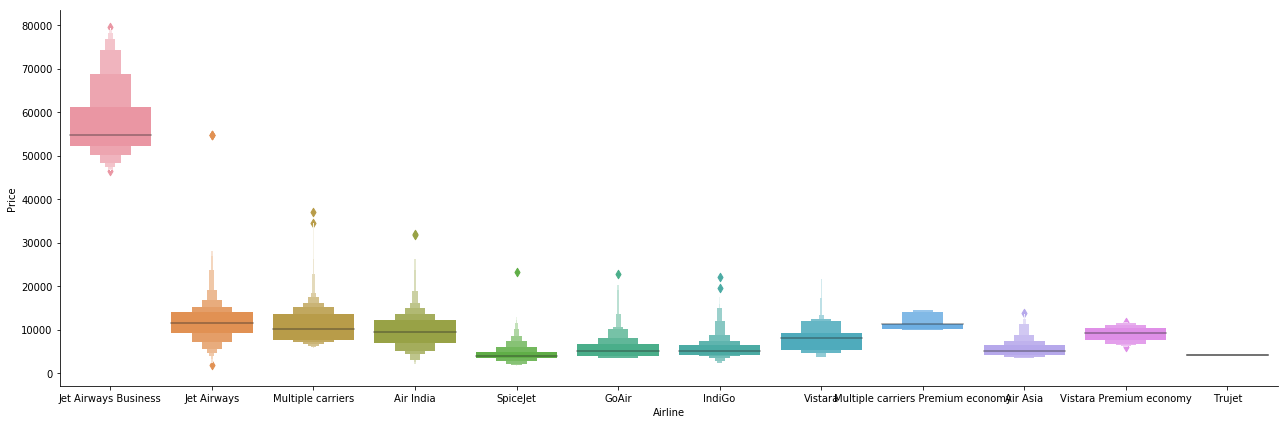

In [51]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = Train_Data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### <font color='#48C9B0'>Source </font>

In [52]:
Train_Data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

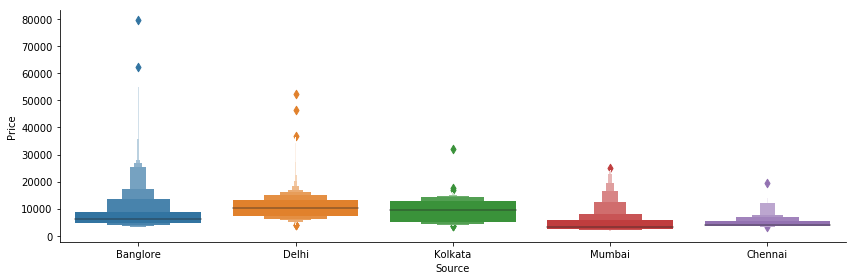

In [53]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = Train_Data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### <font color='#48C9B0'>Destination </font>

In [54]:
Train_Data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

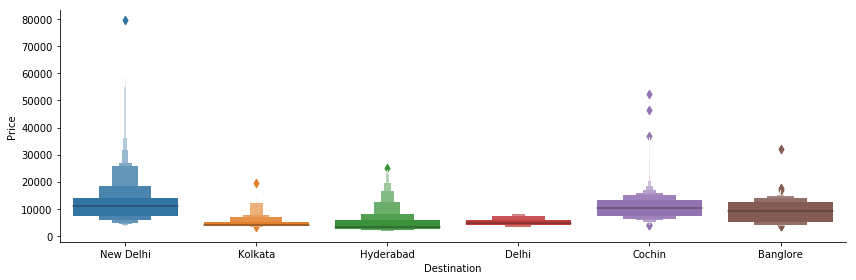

In [55]:
sns.catplot(y = "Price", x = "Destination", data = Train_Data.sort_values("Destination", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### <font color='#48C9B0'>Route </font>

In [56]:
Train_Data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
6              BLR → BOM → DEL
7              BLR → BOM → DEL
8              BLR → BOM → DEL
9              DEL → BOM → COK
10             DEL → BLR → COK
11                   CCU → BLR
12                   MAA → CCU
13             CCU → BOM → BLR
14                   CCU → BLR
15       DEL → AMD → BOM → COK
16             DEL → PNQ → COK
17             DEL → BOM → COK
18       DEL → CCU → BOM → COK
19             DEL → BOM → COK
20             DEL → BOM → COK
21             BLR → COK → DEL
22                   BLR → DEL
23                   BLR → DEL
24             CCU → BOM → BLR
25       DEL → IDR → BOM → COK
26             DEL → LKO → COK
27             DEL → BOM → COK
28                   BLR → DEL
29                   MAA → CCU
                 ...          
10653          CCU → BOM → BLR
10654   

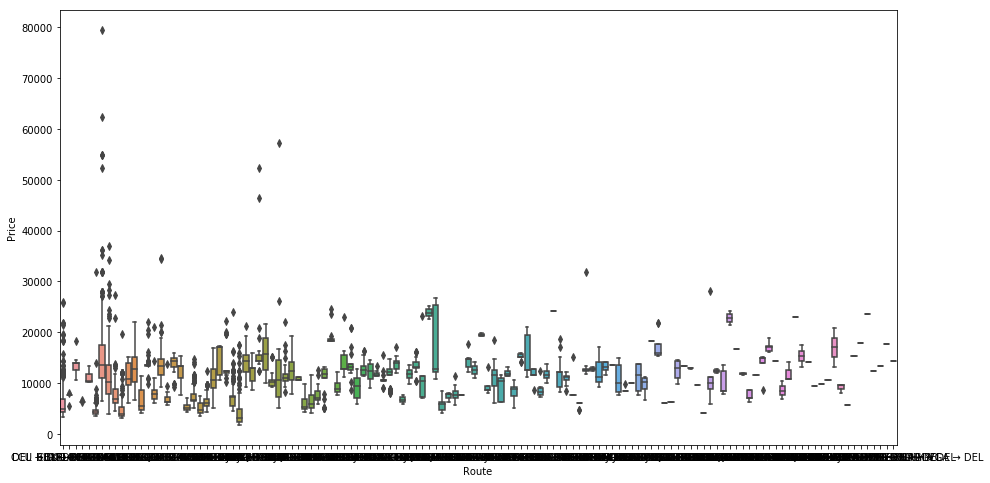

In [57]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Route", y="Price", data=Train_Data)

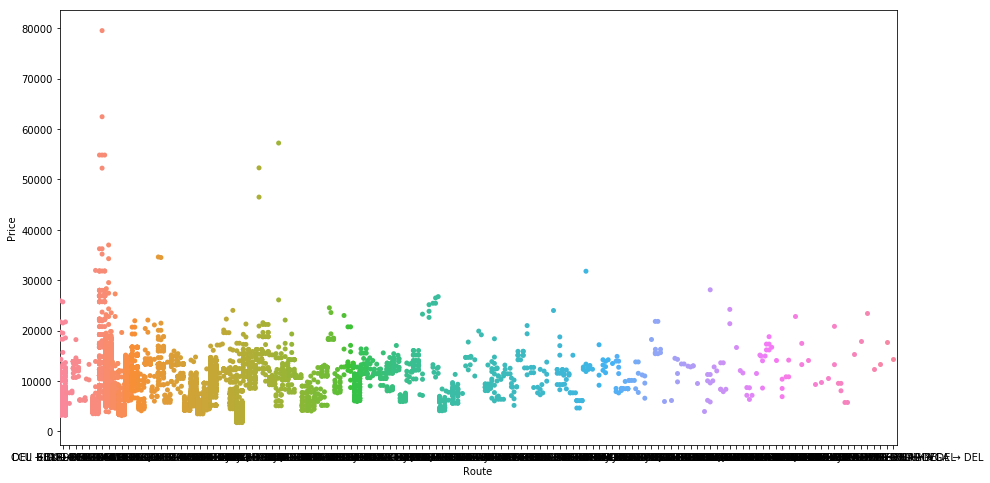

In [58]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Route", y="Price", data=Train_Data)

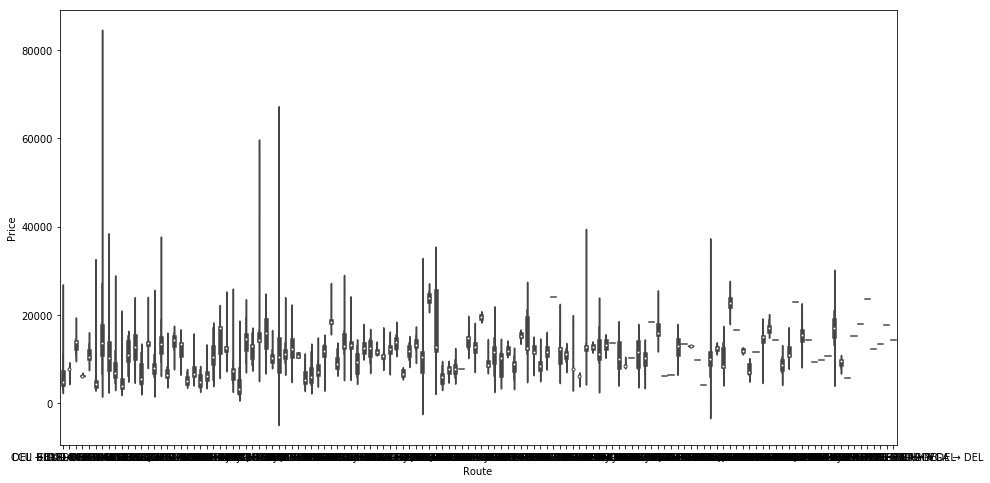

In [59]:
plt.figure(figsize=(15,8))
sns.violinplot(x="Route", y="Price", data=Train_Data)

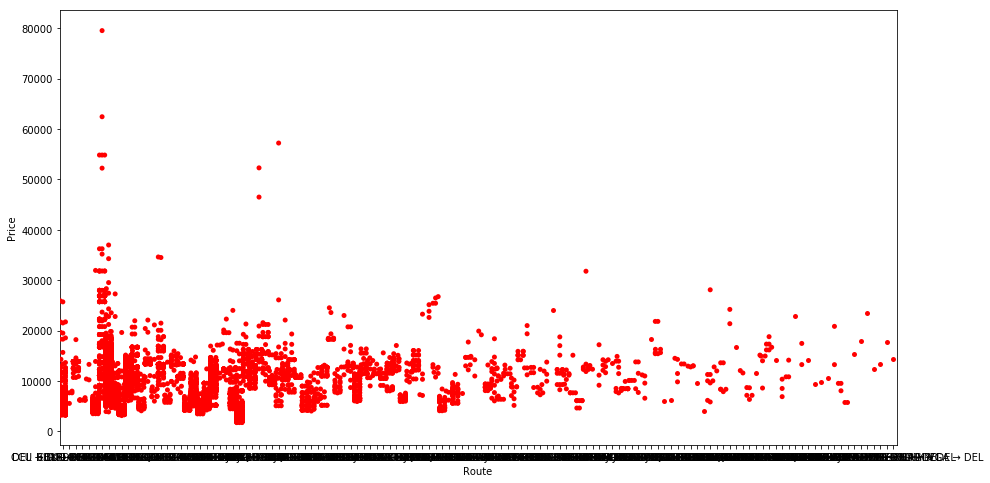

In [60]:
plt.figure(figsize=(15,8))
ax = sns.swarmplot(x="Route", y="Price", data=Train_Data,color="red", edgecolor="gray")

**Pair Plot**

In [61]:
#data.drop('age_group', axis=1, inplace=True)
#sns.pairplot(Train_Data, hue='Price')

## <font color='gray'> Handling Categorical Data </font>


One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case   
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

### <font color='#BB8FCE'>Encoding data</font>

### <font color='#48C9B0'>Encoding categories </font>

In [62]:
Train_Data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [63]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = Train_Data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [64]:
Train_Data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [65]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = Train_Data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [66]:
Train_Data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [67]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = Train_Data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [68]:
Train_Data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
6              BLR → BOM → DEL
7              BLR → BOM → DEL
8              BLR → BOM → DEL
9              DEL → BOM → COK
10             DEL → BLR → COK
11                   CCU → BLR
12                   MAA → CCU
13             CCU → BOM → BLR
14                   CCU → BLR
15       DEL → AMD → BOM → COK
16             DEL → PNQ → COK
17             DEL → BOM → COK
18       DEL → CCU → BOM → COK
19             DEL → BOM → COK
20             DEL → BOM → COK
21             BLR → COK → DEL
22                   BLR → DEL
23                   BLR → DEL
24             CCU → BOM → BLR
25       DEL → IDR → BOM → COK
26             DEL → LKO → COK
27             DEL → BOM → COK
28                   BLR → DEL
29                   MAA → CCU
                 ...          
10653          CCU → BOM → BLR
10654   

In [69]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

Train_Data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [70]:

Train_Data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [71]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

Train_Data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [72]:
Train_Data.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [73]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([Train_Data, Airline, Source, Destination], axis = 1)

In [74]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [75]:
data_train.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

           ...            Airline_Vistara Premium economy  Source_Chennai  \
0          ...                                          0               0   
1          ...                                          0               0   
2          ...                                          0               0   
3          ...                                          0               0   
4          ...                                          0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             0               0              0                   0   
1             0               1              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 30 columns]

In [76]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
Total_Stops                                  10682 non-null int64
Price                                        10682 non-null int64
Journey_day                                  10682 non-null int64
Journey_month                                10682 non-null int64
Dep_hour                                     10682 non-null int64
Dep_min                                      10682 non-null int64
Arrival_hour                                 10682 non-null int64
Arrival_min                                  10682 non-null int64
Duration_hours                               10682 non-null int64
Duration_mins                                10682 non-null int64
Airline_Air India                            10682 non-null uint8
Airline_GoAir                                10682 non-null uint8
Airline_IndiGo                               10682 non-null uint8
Airline_Jet Airways              

In [77]:
data_train.shape

(10682, 30)

### <font color='#BB8FCE'>Test Data Preprocesssing </font>

In [78]:
Test_Data = pd.read_excel(r"D:\Projects\2.Flight Fare\Test_set.xlsx")

In [79]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(Test_Data.info())

print()
print()

print("Null values :")
print("-"*75)
Test_Data.dropna(inplace = True)
print(Test_Data.isnull().sum())

# EDA

# Date_of_Journey
Test_Data["Journey_day"] = pd.to_datetime(Test_Data.Date_of_Journey, format="%d/%m/%Y").dt.day
Test_Data["Journey_month"] = pd.to_datetime(Test_Data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
Test_Data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
Test_Data["Dep_hour"] = pd.to_datetime(Test_Data["Dep_Time"]).dt.hour
Test_Data["Dep_min"] = pd.to_datetime(Test_Data["Dep_Time"]).dt.minute
Test_Data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
Test_Data["Arrival_hour"] = pd.to_datetime(Test_Data.Arrival_Time).dt.hour
Test_Data["Arrival_min"] = pd.to_datetime(Test_Data.Arrival_Time).dt.minute
Test_Data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(Test_Data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
Test_Data["Duration_hours"] = duration_hours
Test_Data["Duration_mins"] = duration_mins
Test_Data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(Test_Data["Airline"].value_counts())
Airline = pd.get_dummies(Test_Data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(Test_Data["Source"].value_counts())
Source = pd.get_dummies(Test_Data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(Test_Data["Destination"].value_counts())
Destination = pd.get_dummies(Test_Data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
Test_Data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
Test_Data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([Test_Data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", Test_Data.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
-------------------------------

In [80]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12              5         6       20            10   
2            1           21              5        19       15            19   
3            1           21              5         8        0            21   
4            0           24              6        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Air India    ...      \
0           25              10             55          0    ...       
1           20               4              0          0    ...       
2            0              23             45          0    ...       
3            0              13              0          0    ...       
4           45               2             50          0    ...       

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      1        0       0       1      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      1        0       0       1      0   
4                        0        0      0        0       0       0      1   

   Hyderabad  Kolkata  New Delhi  
0          0        0          0  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          0  

[5 rows x 28 columns]

In [81]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 28 columns):
Total_Stops                          2671 non-null int64
Journey_day                          2671 non-null int64
Journey_month                        2671 non-null int64
Dep_hour                             2671 non-null int64
Dep_min                              2671 non-null int64
Arrival_hour                         2671 non-null int64
Arrival_min                          2671 non-null int64
Duration_hours                       2671 non-null int64
Duration_mins                        2671 non-null int64
Air India                            2671 non-null uint8
GoAir                                2671 non-null uint8
IndiGo                               2671 non-null uint8
Jet Airways                          2671 non-null uint8
Jet Airways Business                 2671 non-null uint8
Multiple carriers                    2671 non-null uint8
Multiple carriers Premium economy    2

In [82]:
print("Shape of test data : ", data_test.shape)

Shape of test data :  (2671, 28)


### <font color='#BB8FCE'>Feature Importance / Selection</font>

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**          
**feature_importance_**         
**SelectKBest**      

In [83]:
data_train.shape

(10682, 30)

In [84]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [85]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_min  Duration_hours  Duration_mins  Airline_Air India  \
0           10               2             50                  0   
1           15               7             25                  1   
2           25              19              0                  0   
3           30               5             25                  0   
4           35               4             45                  0   

           ...            Airline_Vistara Premium economy  Source_Chennai  \
0          ...                                          0               0   
1          ...                                          0               0   
2          ...                                          0               0   
3          ...                                          0               0   
4          ...                                          0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             0               0              0                   0   
1             0               1              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 29 columns]

In [86]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

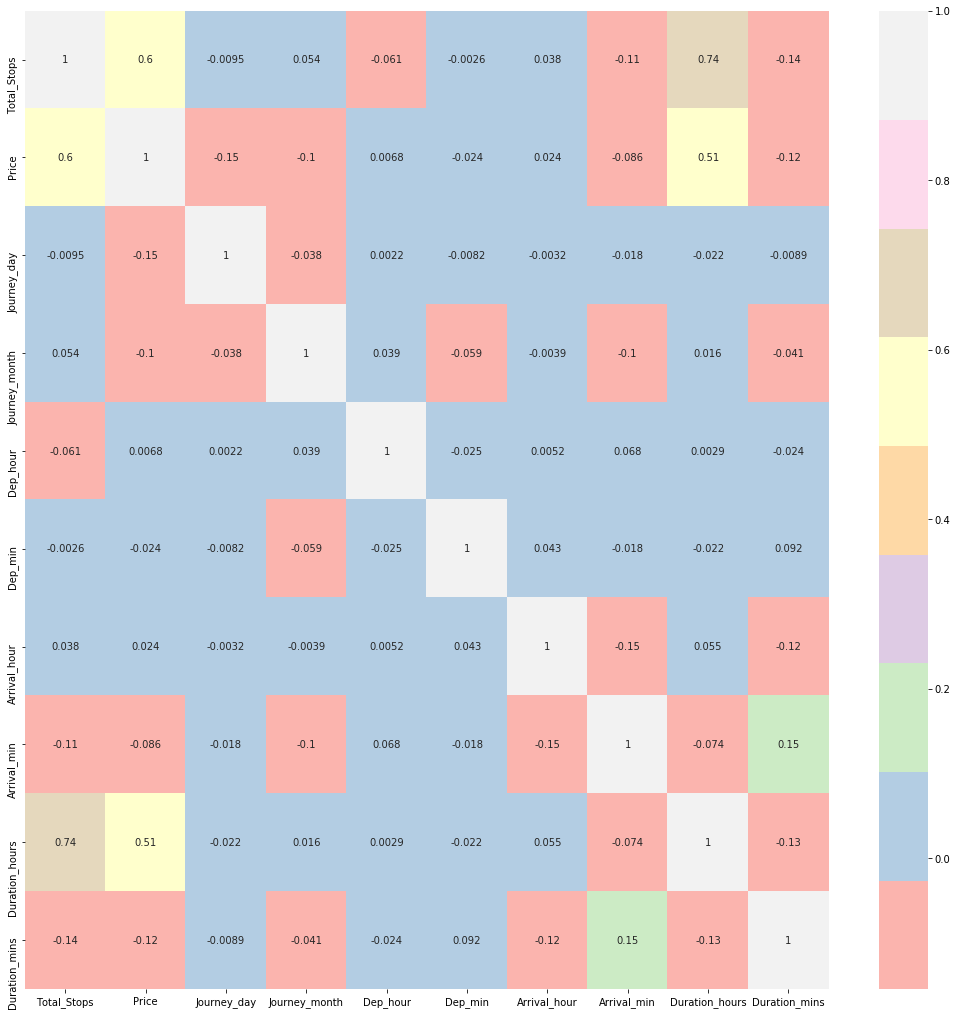

In [87]:

# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(Train_Data.corr(), annot = True, cmap = "Pastel1")

plt.show()

In [88]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
print(selection.feature_importances_)

[2.41851477e-01 1.48745693e-01 5.26637561e-02 2.57627455e-02
 2.04034778e-02 2.57176976e-02 2.04243025e-02 5.05385698e-02
 1.57515726e-02 1.02663753e-02 1.32123824e-03 1.57845687e-02
 1.69617044e-01 6.80874609e-02 1.99118927e-02 9.34769047e-04
 1.93690384e-03 6.91748056e-05 4.87977652e-03 9.59016518e-05
 2.24455087e-04 1.61437766e-02 2.46890567e-03 3.97232344e-03
 2.33763225e-02 2.13908242e-02 1.16762509e-02 4.73368446e-04
 2.55093755e-02]


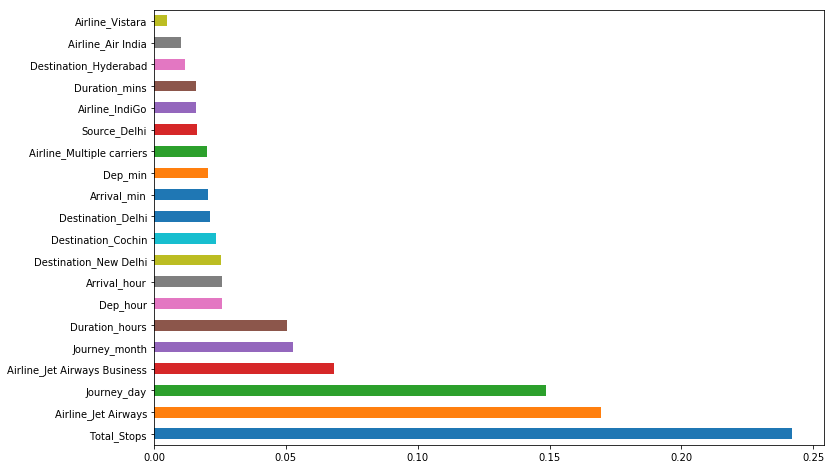

In [90]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## <font color='gray'>Modeling</font>

### <font color='#48C9B0'>Fitting model using Random Forest</font>

1.Split dataset into train and test set in order to prediction w.r.t X_test      
2.If needed do scaling of data            
      -Scaling is not done in Random forest                        
3.Import model             
4.Fit the data           
5.Predict w.r.t X_test          
6.In regression check RSME Score        
7.Plot graph         

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [93]:
y_pred = reg_rf.predict(X_test)

In [94]:
reg_rf.score(X_train, y_train)

0.945535738138919

In [95]:
reg_rf.score(X_test, y_test)

0.7863319460489576

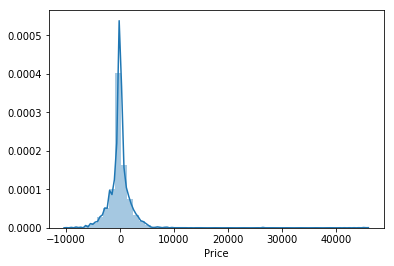

In [96]:
sns.distplot(y_test-y_pred)
#plt.legend(y_test,y_pred)
plt.show()

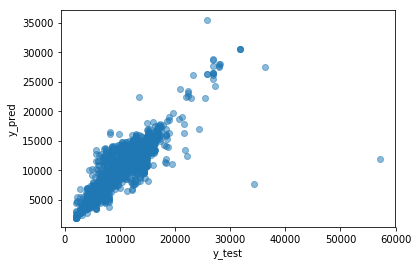

In [97]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [98]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1208.3135804718083
MSE: 4607122.613966416
RMSE: 2146.4208846278066


In [99]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [100]:
metrics.r2_score(y_test, y_pred)

0.7863319460489576

### <font color='#48C9B0'>Hyperparameter Tuning</font>
Choose following method for hyperparameter tuning      
RandomizedSearchCV --> Fast          
GridSearchCV          
Assign hyperparameters in form of dictionery           
Fit the model          
Check best paramters and best score     

In [101]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [102]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [103]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = 
                               random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [104]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [105]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [106]:
prediction = rf_random.predict(X_test)

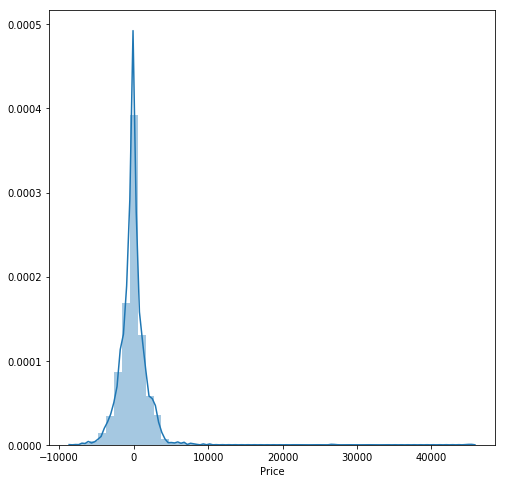

In [107]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

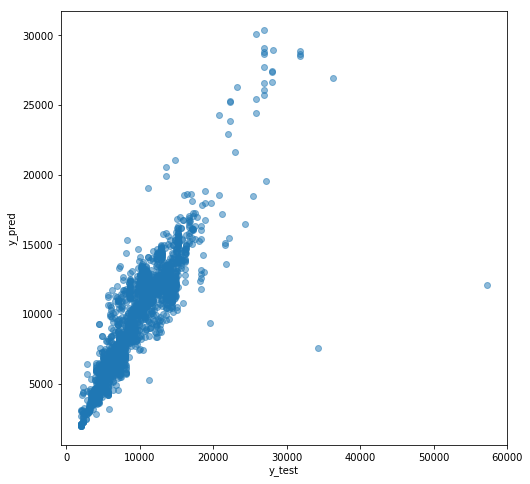

In [108]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1166.7756379366988
MSE: 4051734.1962657156
RMSE: 2012.8919981622748


## <font color='gray'>Save the model to reuse it again</font>

In [115]:
import pickle
# open a file, where you ant to store the data
pickle_out = open("flight_rf.pkl","wb")
# dump information to that file
pickle.dump(reg_rf, pickle_out)
pickle_out.close()

In [116]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [117]:
y_prediction = forest.predict(X_test)

In [118]:
metrics.r2_score(y_test, y_prediction)

0.7863319460489576

### <font color='#48C9B0'>Fitting model using XGBoost Regressor</font>

1.Split dataset into train and test set in order to prediction w.r.t X_test      
2.If needed do scaling of data            
      -Scaling is not done in XGBoost                       
3.Import model             
4.Fit the data           
5.Predict w.r.t X_test          
6.In regression check RSME Score        
7.Plot graph         

[13:54:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:54:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:54:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

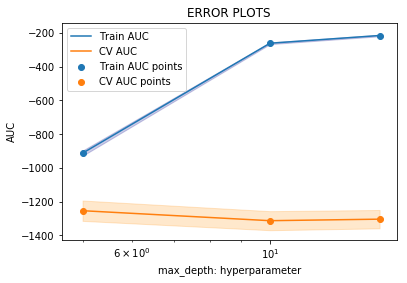

Best parameters:  {'max_depth': 5}


In [125]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model_XGBoost =  XGBRegressor(objective='reg:squarederror',n_iter=20)
max_depth= [5, 10, 15]
parameters = {'max_depth': [5, 10, 15]}

clf_XGBoost = GridSearchCV(model_XGBoost, parameters, cv=3, scoring='neg_mean_absolute_error',return_train_score=True)
clf_XGBoost.fit(X_train, y_train)

train_auc= clf_XGBoost.cv_results_['mean_train_score']
train_auc_std= clf_XGBoost.cv_results_['std_train_score']
cv_auc = clf_XGBoost.cv_results_['mean_test_score'] 
cv_auc_std= clf_XGBoost.cv_results_['std_test_score']

plt.plot(max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(max_depth,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(max_depth,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.show()
print('Best parameters:  {}'.format(clf_XGBoost .best_params_))

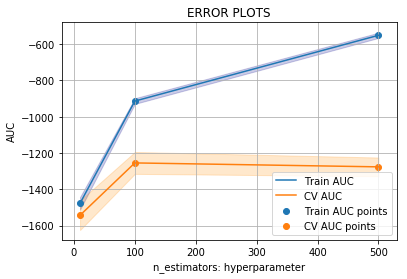

Best parameters:  {'n_estimators': 100}


In [127]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 100, 500]} 
n_estimators=[10, 100, 500]
model_XGBoost=XGBRegressor(objective='reg:squarederror',max_depth=5)


clf_XGBoost = GridSearchCV(model_XGBoost, parameters, cv=3, scoring='neg_mean_absolute_error',return_train_score=True)
clf_XGBoost.fit(X_train, y_train)

train_auc= clf_XGBoost.cv_results_['mean_train_score']
train_auc_std= clf_XGBoost.cv_results_['std_train_score']
cv_auc = clf_XGBoost.cv_results_['mean_test_score'] 
cv_auc_std= clf_XGBoost.cv_results_['std_test_score']

plt.plot(n_estimators, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(n_estimators,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(n_estimators, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(n_estimators,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")


plt.scatter(n_estimators, train_auc, label='Train AUC points')
plt.scatter(n_estimators, cv_auc, label='CV AUC points')
plt.legend()
plt.grid()
plt.show()
print('Best parameters:  {}'.format(clf_XGBoost .best_params_))

### <font color='#48C9B0'>Training XGBClassifier with best hyperparameters </font>
Choose following method for hyperparameter tuning      
RandomizedSearchCV --> Fast          
GridSearchCV          
Assign hyperparameters in form of dictionery           
Fit the model          
Check best paramters and best score  

In [132]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:    6.9s finished


[14:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.7927586465109844
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [154]:
xgb = XGBRegressor(**xgb_grid.best_params_)
xgb.fit(X_train,y_train)

[14:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.03, max_delta_step=0, max_depth=7,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [155]:
score = xgb.score(X_train, y_train)   
print("Training score: ", score) 

Training score:  0.9251450943702137


In [156]:
score = xgb.score(X_test, y_test)   
print("Test score: ", score) 

Test score:  0.852011239791301


In [157]:
from sklearn.metrics import mean_squared_error
ypred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

MSE: 4607122.61
RMSE: 2303561.31


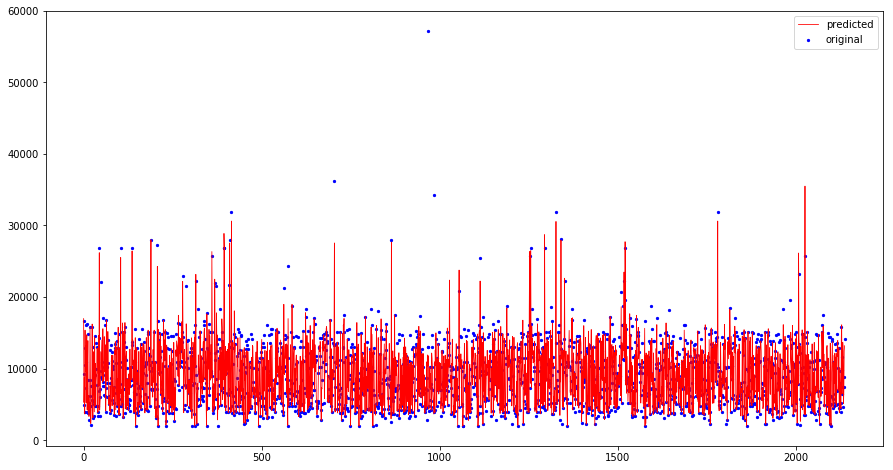

In [152]:
x_ax = range(len(y_test))
plt.figure(figsize=(15,8))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## <font color='gray'>Save the model to reuse it again</font>

In [158]:
import pickle
# open a file, where you ant to store the data
pickle_out = open("flight_xgb.pkl","wb")
# dump information to that file
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [159]:
model = open('flight_xgb.pkl','rb')
xgb = pickle.load(model)

[14:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [160]:
y_prediction = xgb.predict(X_test)

In [161]:
metrics.r2_score(y_test, y_prediction)

0.8520112397913009